In [2]:
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import math

In [11]:
# Load symbol metadata
meta_df = pd.read_csv('/content/symbols_valid_meta.csv')
meta_df.head(10)

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N
5,Y,AAL,"American Airlines Group, Inc. - Common Stock",Q,Q,N,100.0,N,N,NaN,AAL,N
6,Y,AAMC,Altisource Asset Management Corp Com,A,,N,100.0,N,NaN,AAMC,AAMC,N
7,Y,AAME,Atlantic American Corporation - Common Stock,Q,G,N,100.0,N,N,NaN,AAME,N
8,Y,AAN,"Aaron's, Inc. Common Stock",N,,N,100.0,N,NaN,AAN,AAN,N
9,Y,AAOI,"Applied Optoelectronics, Inc. - Common Stock",Q,G,N,100.0,N,N,NaN,AAOI,N


In [12]:

stock = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
stock.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288574,24.757328,23.848700,24.746220,212818400
2015-01-05,23.604328,24.137509,23.417716,24.057531,257142000
2015-01-06,23.606564,23.866489,23.244444,23.668768,263188400
2015-01-07,23.937571,24.037541,23.704304,23.815383,160423600
2015-01-08,24.857309,24.915071,24.148623,24.266369,237458000


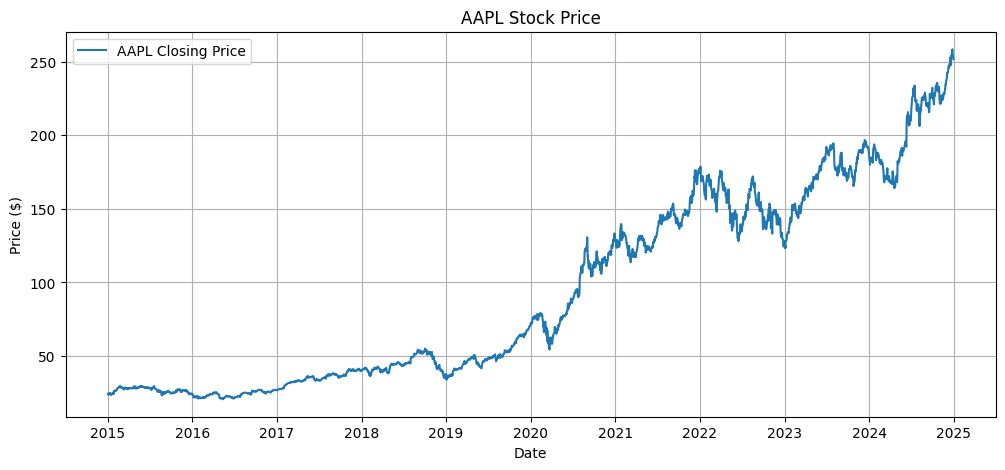

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(stock['Close'], label='AAPL Closing Price')
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.show()

In [7]:

data = stock[['Close']].dropna()

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 0.0190 - val_loss: 8.5556e-04
Epoch 2/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - loss: 3.4114e-04 - val_loss: 0.0012
Epoch 3/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.8676e-04 - val_loss: 0.0013
Epoch 4/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.6132e-04 - val_loss: 0.0012
Epoch 5/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 2.4450e-04 - val_loss: 0.0018
Epoch 6/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.5328e-04 - val_loss: 0.0013
Epoch 7/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.5560e-04 - val_loss: 0.0014
Epoch 8/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 2.6509e-04 - val_loss: 0.0030
Epoch 9/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.2370e-04 - val_loss: 0.0014
Epoch 10/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 1.8882e-04 - val_loss: 0.0021
Epoch 11/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - loss: 2.4670e-04 - val_loss: 0.0025
Epoch 12/25
62/62 ━━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


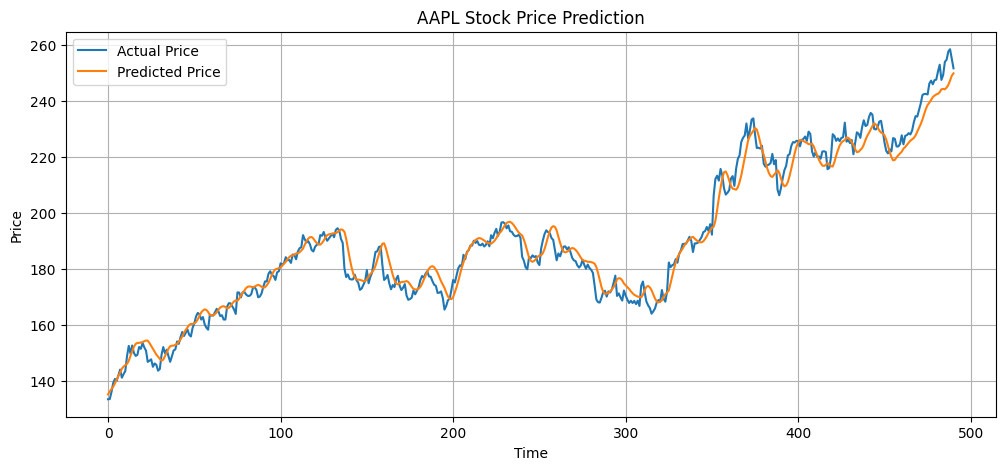

RMSE: 4.39
MAE : 3.38


In [24]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(12,5))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title("AAPL Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Evaluation
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)
print(f'RMSE: {rmse:.2f}')
print(f'MAE : {mae:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━

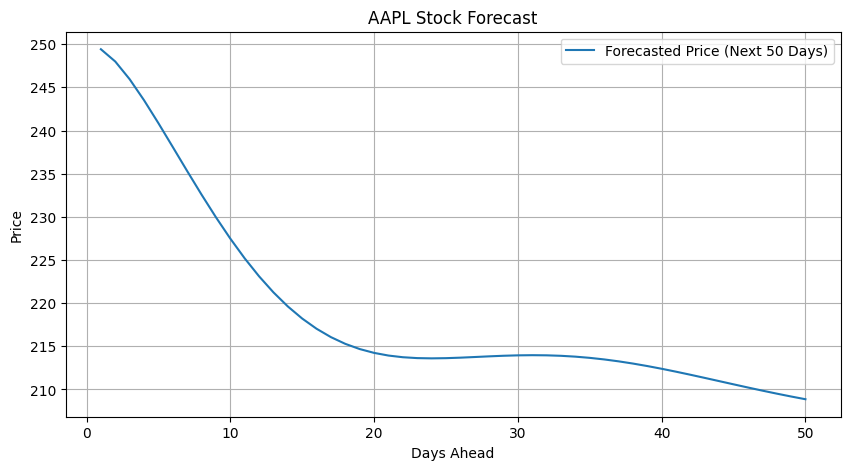

In [25]:
# Predict next 50 days using last sequence
last_sequence = scaled_data[-sequence_length:]
future_input = last_sequence.reshape((1, sequence_length, 1))
future_predictions = []

for _ in range(50):
    pred = model.predict(future_input)[0, 0]
    future_predictions.append(pred)
    future_input = np.append(future_input[:, 1:, :], [[[pred]]], axis=1)

# Inverse scale
future_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot
plt.figure(figsize=(10,5))
plt.plot(range(1, 51), future_prices, label="Forecasted Price (Next 50 Days)")
plt.title("AAPL Stock Forecast")
plt.xlabel("Days Ahead")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()